In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
import simplejson

In [3]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [6]:
#loading credentials
with open("spotifywerk.json") as fh:
    creds = simplejson.loads(fh.read())


In [7]:
cid = creds['client_id']
csecret = creds['secret']

In [8]:
uid='jesjes354'

In [106]:
#https://towardsdatascience.com/playlist-classification-on-spotify-using-knn-and-naive-bayes-classification-35a279b7e255

client_credentials_manager = SpotifyClientCredentials(client_id=cid, 
                                                      client_secret=csecret) 
scope = 'user-top-read'
redirect_uri="https://github.com/jessimk"
try:
    token = util.prompt_for_user_token(uid, scope, 
                                       client_id=cid, 
                                       client_secret=csecret, 
                                       redirect_uri=redirect_uri)  
    sp=spotipy.Spotify(auth= token)
except:
    print('Token is not accesible for ' + uid)

In [77]:
current_playlists = sp.current_user_playlists(limit=50, offset=0)

In [87]:
playlist_list_names = []
playlist_list_ids = []

for i, playlists in enumerate(current_playlists['items']):
    playlist_list_names.append(playlists['name'])
    playlist_list_ids.append(playlists['id'])

In [89]:
playlist_names_ids = dict(zip(playlist_list_names, playlist_list_ids))


In [90]:
playlist_names_ids

{'Running music': '2wtefKQXJnhl6Wa2tFf5OH',
 'Hunnybee': '1koYjrm28MXy50bLBp5WDq',
 "Papi's iPod": '5Ueufhk4hfXTHxtuxg4ptP'}

In [91]:
playlist_tracks = sp.playlist_tracks(playlist_names_ids['Hunnybee'], fields=None, limit=100, offset=0, market=None)

In [109]:
playlist_tracks['items'][0]

{'added_at': '2019-12-01T01:06:32Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/jesjes354'},
  'href': 'https://api.spotify.com/v1/users/jesjes354',
  'id': 'jesjes354',
  'type': 'user',
  'uri': 'spotify:user:jesjes354'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5xeBMeW0YzWIXSVzAxhM8O'},
     'href': 'https://api.spotify.com/v1/artists/5xeBMeW0YzWIXSVzAxhM8O',
     'id': '5xeBMeW0YzWIXSVzAxhM8O',
     'name': 'of Montreal',
     'type': 'artist',
     'uri': 'spotify:artist:5xeBMeW0YzWIXSVzAxhM8O'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    '

In [92]:
playlist_tracks['items'][0]['track']['id']

'3X8gOyVXP93Tslnz9Bxw24'

In [115]:
track_ids = []
for number, track in enumerate(playlist_tracks['items']):
    track_ids.append(track['track']['id'])

In [133]:
track_features = pd.DataFrame.from_dict(sp.audio_features(track_ids))

In [134]:
df = []
for track_id in track_ids:
    track_info = sp.track(track_id)
    
    row = [track_id, 
               track_info['name'], 
               track_info['artists'][0]['name'], 
               track_info['popularity'], 
               track_info['album']['release_date'],
               track_info['explicit']
          ]
    
    df.append(row)
    row = []
    
track_data = pd.DataFrame(df, columns = ['id', 'name', 'artist', 'popularity', 'album_release_dt', 'explicit'])

In [137]:
playlist_track_data = pd.merge(track_data, track_features, on='id')

In [143]:
playlist_track_data.columns

Index(['id', 'name', 'artist', 'popularity', 'album_release_dt', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [138]:
playlist_track_data.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,51.097222,0.669236,0.647986,5.416667,-7.564764,0.527778,0.067247,0.178320,0.201033,0.173707,0.548451,120.507056,246711.458333,3.972222
std,17.623735,0.173025,0.165909,3.888408,2.162624,0.502731,0.048172,0.234723,0.311017,0.123409,0.228009,22.289665,64815.655407,0.374249
min,3.000000,0.259000,0.251000,0.000000,-12.418000,0.000000,0.026200,0.000342,0.000000,0.023300,0.045800,73.998000,137600.000000,1.000000
25%,45.250000,0.555000,0.522750,1.000000,-8.987750,0.000000,0.036650,0.017575,0.000295,0.099025,0.411250,109.224000,201732.750000,4.000000
50%,53.000000,0.687000,0.669500,6.500000,-7.329000,1.000000,0.051050,0.067850,0.004685,0.121000,0.569500,119.464500,225433.000000,4.000000
75%,60.250000,0.803250,0.784000,8.000000,-5.937250,1.000000,0.079575,0.219750,0.332000,0.220000,0.734250,126.048500,287587.750000,4.000000
max,97.000000,0.975000,0.927000,11.000000,-3.240000,1.000000,0.284000,0.873000,0.972000,0.648000,0.966000,183.241000,436237.000000,5.000000


In [147]:
playlist_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 23 columns):
id                  72 non-null object
name                72 non-null object
artist              72 non-null object
popularity          72 non-null int64
album_release_dt    72 non-null object
explicit            72 non-null bool
danceability        72 non-null float64
energy              72 non-null float64
key                 72 non-null int64
loudness            72 non-null float64
mode                72 non-null int64
speechiness         72 non-null float64
acousticness        72 non-null float64
instrumentalness    72 non-null float64
liveness            72 non-null float64
valence             72 non-null float64
tempo               72 non-null float64
type                72 non-null object
uri                 72 non-null object
track_href          72 non-null object
analysis_url        72 non-null object
duration_ms         72 non-null int64
time_signature      72 non-null int6

In [148]:
features_to_plot = playlist_track_data.drop(columns=['id', 'name', 'artist','album_release_dt','type', 'explicit','uri', 'track_href', 'analysis_url'],axis=1)

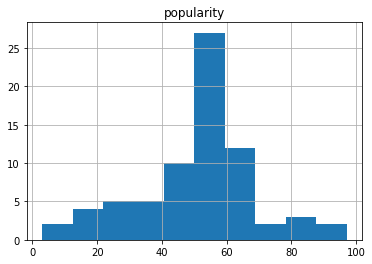

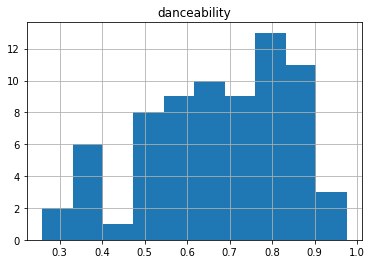

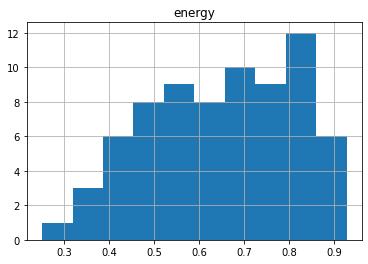

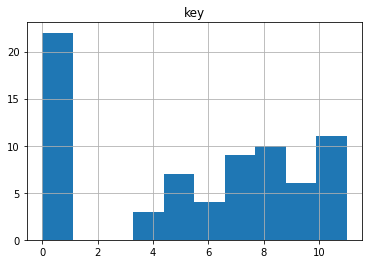

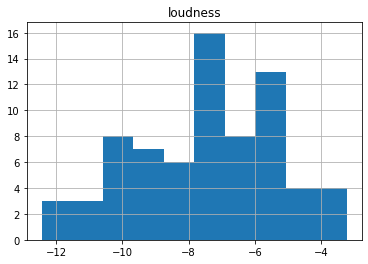

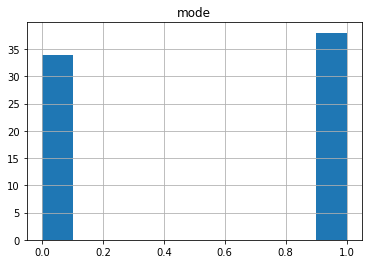

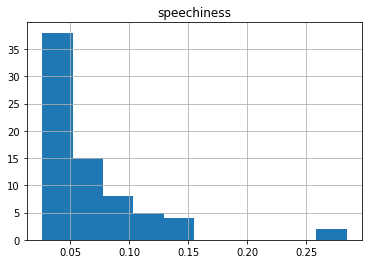

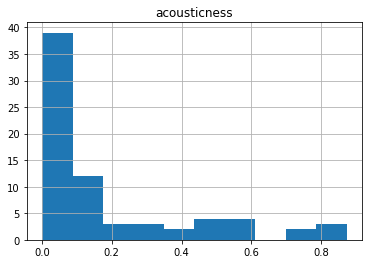

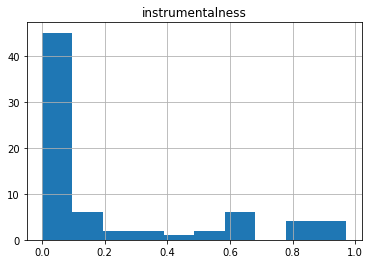

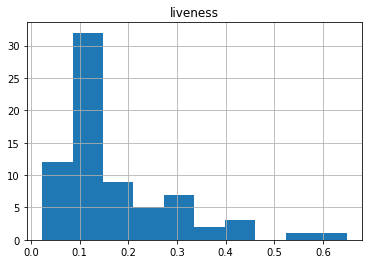

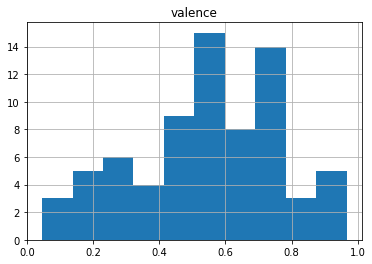

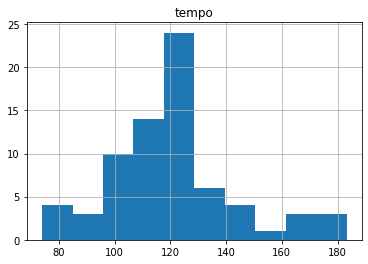

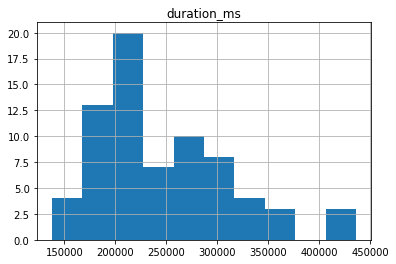

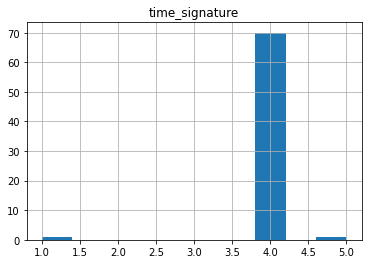

In [161]:
for feature in features_to_plot.columns:
    plt.figure()
    plt.title(feature)
    features_to_plot[feature].hist()

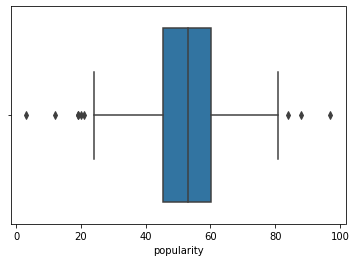

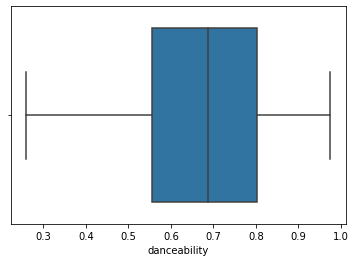

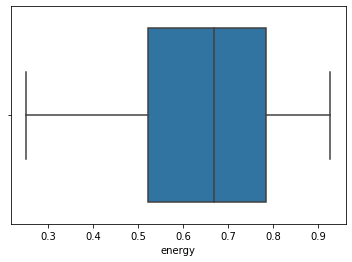

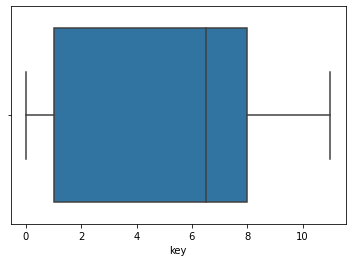

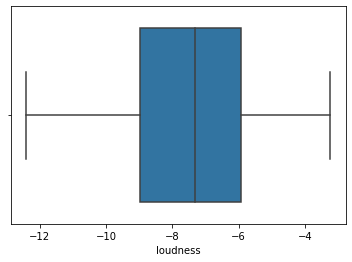

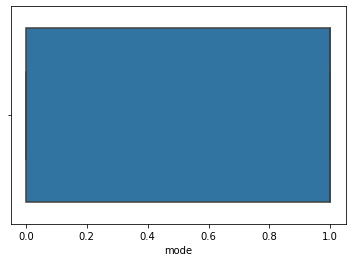

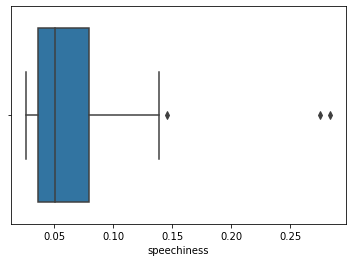

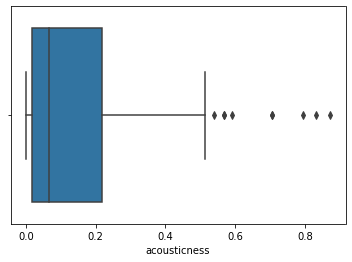

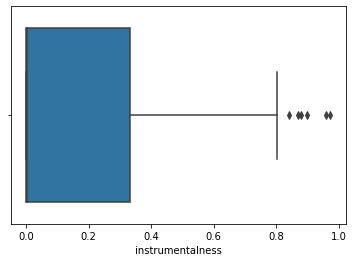

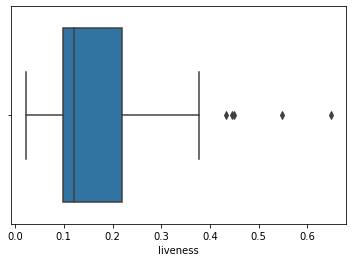

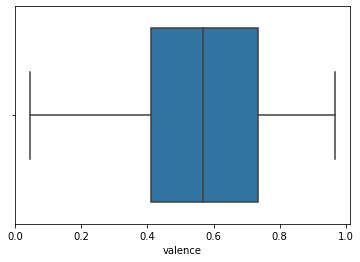

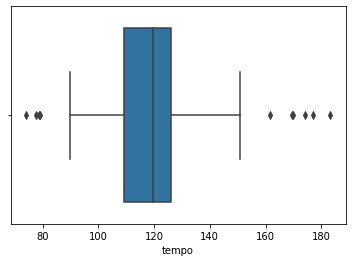

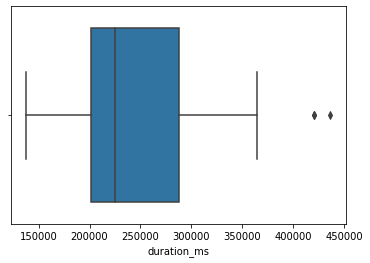

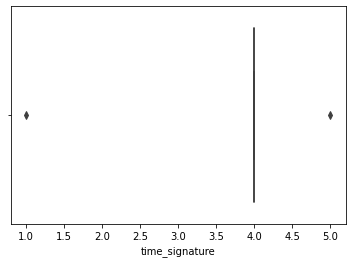

In [159]:
for feature in features_to_plot.columns:
    plt.figure()
    sns.boxplot(feature, data=features_to_plot)

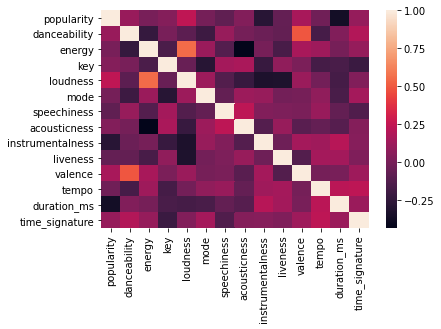

In [153]:
sns.heatmap(features_to_plot.corr())

### DBSCAN

In [310]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

spoticluster = features_to_plot[['valence', 'speechiness',
                                'instrumentalness', 
                                'tempo', 'energy', 'key']] 

In [374]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
neighbs = NearestNeighbors(n_neighbors=2)
nbrs = neighbs.fit(spoticluster)

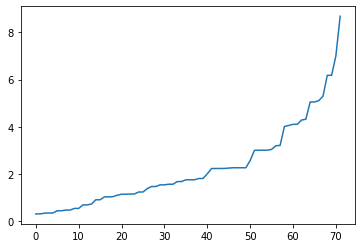

In [375]:
distances, indices = nbrs.kneighbors(spoticluster)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [394]:
db = DBSCAN(eps=5, min_samples=2).fit(spoticluster)
labels = db.labels_

playlist_track_data['clusters'] = labels

In [395]:
labels

array([ 0,  1,  0,  1,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  1,  1,  0,
       -1,  2, -1,  0,  1,  1,  0,  3,  4,  0,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  3, -1, -1,  3,  3, -1,  2,  1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  1, -1,  4])

In [396]:
pd.DataFrame(labels, columns=['labels'])['labels'].value_counts()

 0    41
 1    14
-1     8
 3     4
 2     3
 4     2
Name: labels, dtype: int64

In [368]:
playlist_track_data.query('clusters == 0')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,3X8gOyVXP93Tslnz9Bxw24,Gronlandic Edit,of Montreal,58,2007-01-23,False,0.971,0.400,4,-7.154,...,0.1080,0.652,119.953,audio_features,spotify:track:3X8gOyVXP93Tslnz9Bxw24,https://api.spotify.com/v1/tracks/3X8gOyVXP93T...,https://api.spotify.com/v1/audio-analysis/3X8g...,204760,4,0
2,6VPvz8SZWRFEoawyUTvQTt,Everyone Acts Crazy Nowadays,Unknown Mortal Orchestra,51,2018-04-06,False,0.816,0.755,8,-4.942,...,0.1780,0.735,120.008,audio_features,spotify:track:6VPvz8SZWRFEoawyUTvQTt,https://api.spotify.com/v1/tracks/6VPvz8SZWRFE...,https://api.spotify.com/v1/audio-analysis/6VPv...,254973,4,0
4,22fOsxYglRTjZcTOG8859P,Easy To Get,Hot Chip,48,2015-10-23,False,0.884,0.496,5,-7.738,...,0.2720,0.547,115.968,audio_features,spotify:track:22fOsxYglRTjZcTOG8859P,https://api.spotify.com/v1/tracks/22fOsxYglRTj...,https://api.spotify.com/v1/audio-analysis/22fO...,310295,4,0
5,3DPFmwFtV5ElQaTniLOdgk,Hunnybee,Unknown Mortal Orchestra,68,2018-04-06,False,0.956,0.373,6,-7.963,...,0.3140,0.568,119.994,audio_features,spotify:track:3DPFmwFtV5ElQaTniLOdgk,https://api.spotify.com/v1/tracks/3DPFmwFtV5El...,https://api.spotify.com/v1/audio-analysis/3DPF...,268333,4,0
6,2acK24b60RQD2zBpW0Zsrw,Blind - Radio Edit,Hercules & Love Affair,58,2008-02-29,False,0.716,0.914,7,-6.907,...,0.0504,0.690,118.579,audio_features,spotify:track:2acK24b60RQD2zBpW0Zsrw,https://api.spotify.com/v1/tracks/2acK24b60RQD...,https://api.spotify.com/v1/audio-analysis/2acK...,345560,4,0
8,6G2M6vvToPz12ghZpeJSGe,Atomic Bomb - William Onyeabor vs. Hot Chip,William Onyeabor,49,2014-05-06,False,0.834,0.560,8,-10.062,...,0.4460,0.780,125.798,audio_features,spotify:track:6G2M6vvToPz12ghZpeJSGe,https://api.spotify.com/v1/tracks/6G2M6vvToPz1...,https://api.spotify.com/v1/audio-analysis/6G2M...,436237,4,0
10,31F0KxmTD4rz3o0tJht5RL,Ordinary Pleasure,Toro y Moi,55,2019-01-18,False,0.878,0.779,7,-7.283,...,0.1040,0.778,115.009,audio_features,spotify:track:31F0KxmTD4rz3o0tJht5RL,https://api.spotify.com/v1/tracks/31F0KxmTD4rz...,https://api.spotify.com/v1/audio-analysis/31F0...,183746,4,0
11,3h1iu4HvBlLqRuft2kJEcr,Swim and Sleep (Like a Shark),Unknown Mortal Orchestra,56,2013-02-05,False,0.766,0.806,8,-10.011,...,0.1190,0.760,123.509,audio_features,spotify:track:3h1iu4HvBlLqRuft2kJEcr,https://api.spotify.com/v1/tracks/3h1iu4HvBlLq...,https://api.spotify.com/v1/audio-analysis/3h1i...,165227,4,0
12,1L8H6AuK4TaMmolSL0N0mR,Boy From School,Hot Chip,56,2006-05-22,False,0.631,0.863,8,-3.963,...,0.0846,0.497,125.994,audio_features,spotify:track:1L8H6AuK4TaMmolSL0N0mR,https://api.spotify.com/v1/tracks/1L8H6AuK4TaM...,https://api.spotify.com/v1/audio-analysis/1L8H...,319653,4,0
13,1zbLpabwKzj404PWNEKtjL,Freelance,Toro y Moi,54,2019-01-18,False,0.975,0.475,9,-7.067,...,0.1650,0.867,115.009,audio_features,spotify:track:1zbLpabwKzj404PWNEKtjL,https://api.spotify.com/v1/tracks/1zbLpabwKzj4...,https://api.spotify.com/v1/audio-analysis/1zbL...,225893,4,0


In [369]:
playlist_track_data.query('clusters == 1')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
1,5XcDorvZjj05UPeU4NY3nu,Old Graffiti,Bibio,53,2019-04-12,False,0.639,0.914,10,-7.189,...,0.0382,0.9660,94.823,audio_features,spotify:track:5XcDorvZjj05UPeU4NY3nu,https://api.spotify.com/v1/tracks/5XcDorvZjj05...,https://api.spotify.com/v1/audio-analysis/5XcD...,208853,4,1
3,2EWG2vhqHcPA3kDKf5337J,Tinseltown Swimming in Blood,Destroyer,46,2017-10-20,False,0.679,0.694,0,-7.375,...,0.2060,0.7470,106.992,audio_features,spotify:track:2EWG2vhqHcPA3kDKf5337J,https://api.spotify.com/v1/tracks/2EWG2vhqHcPA...,https://api.spotify.com/v1/audio-analysis/2EWG...,286028,4,1
7,5VarZFY00sO54HErJ3TPCI,So Good At Being in Trouble,Unknown Mortal Orchestra,67,2013-02-05,False,0.829,0.435,0,-10.136,...,0.1190,0.5940,103.816,audio_features,spotify:track:5VarZFY00sO54HErJ3TPCI,https://api.spotify.com/v1/tracks/5VarZFY00sO5...,https://api.spotify.com/v1/audio-analysis/5Var...,230147,4,1
14,2drEUEg0TYQR6dDEHkpuPE,Patience,Tame Impala,69,2019-03-22,False,0.546,0.859,1,-5.966,...,0.0529,0.6450,99.965,audio_features,spotify:track:2drEUEg0TYQR6dDEHkpuPE,https://api.spotify.com/v1/tracks/2drEUEg0TYQR...,https://api.spotify.com/v1/audio-analysis/2drE...,292267,4,1
15,6b7z3keZ5gDJ2zBnyrke9P,Rose Quartz,Toro y Moi,53,2013-01-22,False,0.752,0.482,0,-12.355,...,0.3130,0.4160,109.968,audio_features,spotify:track:6b7z3keZ5gDJ2zBnyrke9P,https://api.spotify.com/v1/tracks/6b7z3keZ5gDJ...,https://api.spotify.com/v1/audio-analysis/6b7z...,253108,4,1
21,2PzWUwFXApjQBZzKMl4Hd6,Saint,Blood Orange,55,2018-08-24,False,0.795,0.629,5,-8.704,...,0.3780,0.0667,100.803,audio_features,spotify:track:2PzWUwFXApjQBZzKMl4Hd6,https://api.spotify.com/v1/tracks/2PzWUwFXApjQ...,https://api.spotify.com/v1/audio-analysis/2PzW...,192010,4,1
22,53KFMdxzi8IJDewiql1Qo3,Sunflower (feat. Steve Lacy),Vampire Weekend,64,2019-05-03,False,0.863,0.576,8,-5.691,...,0.1410,0.9320,100.030,audio_features,spotify:track:53KFMdxzi8IJDewiql1Qo3,https://api.spotify.com/v1/tracks/53KFMdxzi8IJ...,https://api.spotify.com/v1/audio-analysis/53KF...,137600,4,1
29,6vw4YLRXNvtFxA2yxVrR6H,Turn The Light,Karen O,53,2019-03-15,False,0.752,0.462,4,-10.538,...,0.0910,0.8450,101.999,audio_features,spotify:track:6vw4YLRXNvtFxA2yxVrR6H,https://api.spotify.com/v1/tracks/6vw4YLRXNvtF...,https://api.spotify.com/v1/audio-analysis/6vw4...,199320,4,1
31,3O8X1DE9btbzy4UH9cSX9a,Borderline,Tame Impala,75,2019-04-12,False,0.598,0.710,0,-6.839,...,0.1000,0.7260,97.976,audio_features,spotify:track:3O8X1DE9btbzy4UH9cSX9a,https://api.spotify.com/v1/tracks/3O8X1DE9btbz...,https://api.spotify.com/v1/audio-analysis/3O8X...,274294,4,1
33,0XEhhANHRAqXM9c3JSvLfX,CHANCES,KAYTRANADA,46,2018-11-30,False,0.835,0.527,7,-7.272,...,0.2830,0.6110,106.003,audio_features,spotify:track:0XEhhANHRAqXM9c3JSvLfX,https://api.spotify.com/v1/tracks/0XEhhANHRAqX...,https://api.spotify.com/v1/audio-analysis/0XEh...,218200,4,1


In [370]:
playlist_track_data.query('clusters == 2')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
9,53PkA8aXiwH4ppa0V0iO7o,oh baby,LCD Soundsystem,62,2017-09-01,False,0.580,0.622,5,-12.005,...,0.6480,0.781,169.442,audio_features,spotify:track:53PkA8aXiwH4ppa0V0iO7o,https://api.spotify.com/v1/tracks/53PkA8aXiwH4...,https://api.spotify.com/v1/audio-analysis/53Pk...,349693,4,2
18,6TFUZ8Bt1brEwomY90SKXi,Girl Like You,Toro y Moi,57,2017-07-07,False,0.629,0.823,1,-5.744,...,0.0801,0.397,169.961,audio_features,spotify:track:6TFUZ8Bt1brEwomY90SKXi,https://api.spotify.com/v1/tracks/6TFUZ8Bt1brE...,https://api.spotify.com/v1/audio-analysis/6TFU...,223773,4,2
58,6HRa9FtX8ifjQmA3XFBXan,Garden - Calibre Remix,Totally Enormous Extinct Dinosaurs,43,2011-01-01,False,0.730,0.349,0,-8.837,...,0.1240,0.753,174.030,audio_features,spotify:track:6HRa9FtX8ifjQmA3XFBXan,https://api.spotify.com/v1/tracks/6HRa9FtX8ifj...,https://api.spotify.com/v1/audio-analysis/6HRa...,358976,4,2


In [371]:
playlist_track_data.query('clusters == 3')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
24,7qPdc4CH1GGZaHBImyoZ69,Tesselation,Mild High Club,57,2016-08-26,False,0.667,0.407,9,-9.467,...,0.0961,0.547,73.998,audio_features,spotify:track:7qPdc4CH1GGZaHBImyoZ69,https://api.spotify.com/v1/tracks/7qPdc4CH1GGZ...,https://api.spotify.com/v1/audio-analysis/7qPd...,152825,4,3
52,2IqjKEBiz0CdLKdkXhxw84,Retrograde,James Blake,66,2013-04-08,False,0.533,0.251,7,-11.283,...,0.1340,0.186,77.503,audio_features,spotify:track:2IqjKEBiz0CdLKdkXhxw84,https://api.spotify.com/v1/tracks/2IqjKEBiz0Cd...,https://api.spotify.com/v1/audio-analysis/2Iqj...,223600,4,3
55,4KtrE35pTuqwNc22QP58RT,Drop the Game,Flume,52,2013-11-22,False,0.559,0.670,7,-4.985,...,0.1710,0.438,78.957,audio_features,spotify:track:4KtrE35pTuqwNc22QP58RT,https://api.spotify.com/v1/tracks/4KtrE35pTuqw...,https://api.spotify.com/v1/audio-analysis/4Ktr...,221895,4,3
56,3kqXhOP3kzCuqT5Xj689Dr,3,Flume,39,2016-05-27,False,0.342,0.583,11,-7.524,...,0.1210,0.293,78.734,audio_features,spotify:track:3kqXhOP3kzCuqT5Xj689Dr,https://api.spotify.com/v1/tracks/3kqXhOP3kzCu...,https://api.spotify.com/v1/audio-analysis/3kqX...,184822,1,3


In [372]:
playlist_track_data.query('clusters == 4')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
25,7pD6katrwWH7H3Xt8cIZS9,Lemon Glow,Beach House,57,2018-05-11,False,0.466,0.830,0,-7.504,...,0.232,0.510,148.467,audio_features,spotify:track:7pD6katrwWH7H3Xt8cIZS9,https://api.spotify.com/v1/tracks/7pD6katrwWH7...,https://api.spotify.com/v1/audio-analysis/7pD6...,244947,4,4
71,5px6upUHM3fhOP621Edp4V,Physical,Dua Lipa,88,2020-01-30,False,0.647,0.844,0,-3.756,...,0.102,0.746,146.962,audio_features,spotify:track:5px6upUHM3fhOP621Edp4V,https://api.spotify.com/v1/tracks/5px6upUHM3fh...,https://api.spotify.com/v1/audio-analysis/5px6...,193829,4,4


In [373]:
playlist_track_data.query('clusters == -1')

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,clusters
17,3bBmpVl9rQKJsFFGLFilIS,Charcoal Baby,Blood Orange,66,2018-08-24,False,0.622,0.460,7,-8.389,...,0.119,0.5140,183.241,audio_features,spotify:track:3bBmpVl9rQKJsFFGLFilIS,https://api.spotify.com/v1/tracks/3bBmpVl9rQKJ...,https://api.spotify.com/v1/audio-analysis/3bBm...,242341,4,-1
19,6YGVK9xgH2LI4Ghw6gqUxx,Paint Me Silver,Pond,57,2017-05-05,False,0.335,0.825,8,-5.598,...,0.226,0.6820,177.156,audio_features,spotify:track:6YGVK9xgH2LI4Ghw6gqUxx,https://api.spotify.com/v1/tracks/6YGVK9xgH2LI...,https://api.spotify.com/v1/audio-analysis/6YGV...,224973,4,-1
48,5dAgsSs4wqTvnSqpKW7a9o,Marrow,ANOHNI,26,2016-05-06,False,0.482,0.601,8,-10.787,...,0.116,0.0458,150.917,audio_features,spotify:track:5dAgsSs4wqTvnSqpKW7a9o,https://api.spotify.com/v1/tracks/5dAgsSs4wqTv...,https://api.spotify.com/v1/audio-analysis/5dAg...,181204,4,-1
53,3onYsieuDICdVt5ULZSExF,Barefoot In The Park (feat. ROSALÍA),James Blake,64,2019-01-18,False,0.558,0.632,9,-8.339,...,0.198,0.5190,161.764,audio_features,spotify:track:3onYsieuDICdVt5ULZSExF,https://api.spotify.com/v1/tracks/3onYsieuDICd...,https://api.spotify.com/v1/audio-analysis/3onY...,211200,4,-1
54,03NtFY8KBtBsLQg2E9rVDI,Can't Believe The Way We Flow,James Blake,48,2019-01-18,False,0.259,0.536,8,-10.309,...,0.432,0.2900,143.948,audio_features,spotify:track:03NtFY8KBtBsLQg2E9rVDI,https://api.spotify.com/v1/tracks/03NtFY8KBtBs...,https://api.spotify.com/v1/audio-analysis/03Nt...,267200,4,-1
57,44dFOGFKVgNrx6UilTRVfZ,Take a Chance (feat Little Dragon),Flume,49,2016-05-27,False,0.401,0.510,11,-6.284,...,0.151,0.3480,139.888,audio_features,spotify:track:44dFOGFKVgNrx6UilTRVfZ,https://api.spotify.com/v1/tracks/44dFOGFKVgNr...,https://api.spotify.com/v1/audio-analysis/44dF...,328631,4,-1
61,4y6RHngR3wkIt3cWc4JriP,Partners in Motion,Wild Nothing,47,2018-08-31,False,0.511,0.849,8,-5.980,...,0.449,0.7710,89.988,audio_features,spotify:track:4y6RHngR3wkIt3cWc4JriP,https://api.spotify.com/v1/tracks/4y6RHngR3wkI...,https://api.spotify.com/v1/audio-analysis/4y6R...,260693,4,-1
70,3ebXMykcMXOcLeJ9xZ17XH,Scared to Be Lonely,Martin Garrix,80,2017-01-27,False,0.584,0.540,1,-7.786,...,0.261,0.1950,137.972,audio_features,spotify:track:3ebXMykcMXOcLeJ9xZ17XH,https://api.spotify.com/v1/tracks/3ebXMykcMXOc...,https://api.spotify.com/v1/audio-analysis/3ebX...,220883,4,-1


### kmeans ++

In [498]:
spoticluster = features_to_plot[['valence', 'speechiness',
                                'instrumentalness', 
                                'tempo', 'energy', 'key']] 

In [499]:
#https://towardsdatascience.com/profiling-my-favorite-songs-on-spotify-through-clustering-33fee591783d
X = np.array(spoticluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

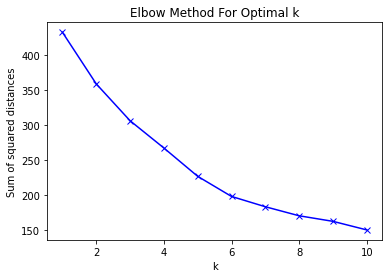

In [500]:
from sklearn import cluster, mixture
from sklearn.metrics import consensus_score

ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [512]:
nclusters = 4

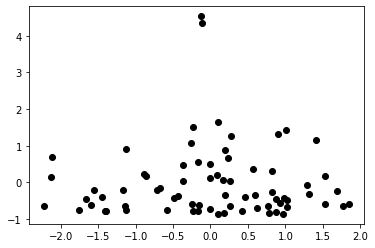

In [513]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')

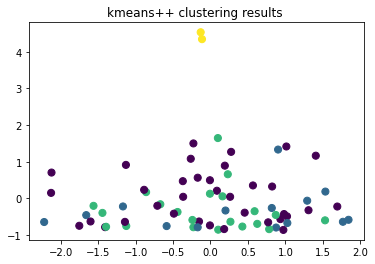

In [525]:
# Fitting K-Means to the dataset
model = KMeans(n_clusters = nclusters, init = 'k-means++')
model.fit(X)
y_pred = model.labels_
plt.title(f'kmeans++ clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)

In [526]:
playlist_track_data['kmeans++'] = y_pred

In [527]:
model = cluster.SpectralClustering(n_clusters = nclusters, eigen_solver='arpack',
        affinity="nearest_neighbors")

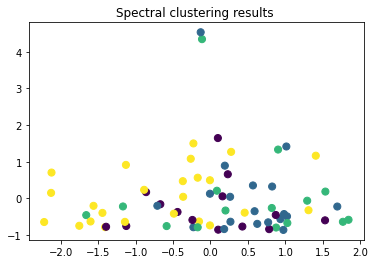

In [528]:
model.fit(X)
y_pred = model.labels_
plt.title(f'Spectral clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)

In [529]:
playlist_track_data['spectral'] = y_pred

In [530]:
model = cluster.Birch(n_clusters = nclusters)

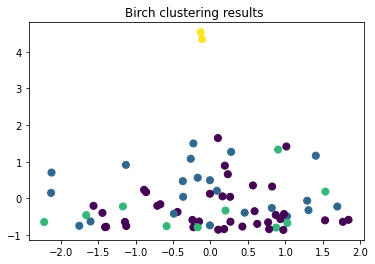

In [531]:
model.fit(X)
y_pred = model.labels_
plt.title(f'Birch clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)

In [532]:
playlist_track_data['birch'] = y_pred

In [533]:
model = cluster.MiniBatchKMeans(n_clusters=nclusters)

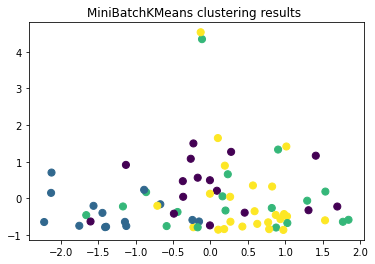

In [534]:
model.fit(X)
y_pred = model.labels_
plt.title(f'MiniBatchKMeans clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred)

In [535]:
playlist_track_data['minibatch'] = y_pred

In [536]:
playlist_track_data.head()

,id,name,artist,popularity,album_release_dt,explicit,danceability,energy,key,loudness,...,uri,track_href,analysis_url,duration_ms,time_signature,clusters,minibatch,kmeans++,spectral,birch
0,3X8gOyVXP93Tslnz9Bxw24,Gronlandic Edit,of Montreal,58,2007-01-23,False,0.971,0.400,4,-7.154,...,spotify:track:3X8gOyVXP93Tslnz9Bxw24,https://api.spotify.com/v1/tracks/3X8gOyVXP93T...,https://api.spotify.com/v1/audio-analysis/3X8g...,204760,4,0,0,0,3,1
1,5XcDorvZjj05UPeU4NY3nu,Old Graffiti,Bibio,53,2019-04-12,False,0.639,0.914,10,-7.189,...,spotify:track:5XcDorvZjj05UPeU4NY3nu,https://api.spotify.com/v1/tracks/5XcDorvZjj05...,https://api.spotify.com/v1/audio-analysis/5XcD...,208853,4,1,2,1,2,0
2,6VPvz8SZWRFEoawyUTvQTt,Everyone Acts Crazy Nowadays,Unknown Mortal Orchestra,51,2018-04-06,False,0.816,0.755,8,-4.942,...,spotify:track:6VPvz8SZWRFEoawyUTvQTt,https://api.spotify.com/v1/tracks/6VPvz8SZWRFE...,https://api.spotify.com/v1/audio-analysis/6VPv...,254973,4,0,3,0,1,0
3,2EWG2vhqHcPA3kDKf5337J,Tinseltown Swimming in Blood,Destroyer,46,2017-10-20,False,0.679,0.694,0,-7.375,...,spotify:track:2EWG2vhqHcPA3kDKf5337J,https://api.spotify.com/v1/tracks/2EWG2vhqHcPA...,https://api.spotify.com/v1/audio-analysis/2EWG...,286028,4,1,2,1,2,2
4,22fOsxYglRTjZcTOG8859P,Easy To Get,Hot Chip,48,2015-10-23,False,0.884,0.496,5,-7.738,...,spotify:track:22fOsxYglRTjZcTOG8859P,https://api.spotify.com/v1/tracks/22fOsxYglRTj...,https://api.spotify.com/v1/audio-analysis/22fO...,310295,4,0,0,0,3,1
